In [1]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.8 MB/s 


In [ ]:
#method for getting x_tilda for each image
#getting the path of the train dataset 
#intializing the X array with ones 
#looping on the train set
#starting from 1 
#generating a path for each image
#getting the path of each image, flattening its array, adding ones and add it to the X array 

In [97]:
import patoolib

In [98]:
patoolib.extract_archive('/content/Data.zip')

patool: Extracting /content/Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_u4ngbdm7 -- /content/Data.zip
patool: ... /content/Data.zip extracted to `Data1' (local file exists).


'Data1'

In [99]:
import numpy as np
from PIL import Image

In [100]:
def assigning(rows,columns,value):
  mylist = np.empty([rows,columns], dtype = int)
  for i in range(rows):
    for j in range(columns):
       mylist[i][j] = value
  return mylist



In [101]:
#adding the extra column of ones as the LSM requires an extra column of ones
images = assigning(2400,785,1)
images

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [102]:
#method for getting x_tilda for each image 
def getXTilda():
#getting the path of the train dataset  
    path = "/content/Data/Train/"
#intializing the X array with ones   
    X = assigning(2400, 785, 1)
#looping on the train set
    for i in range(2400):
#starting from 1      
      curri = i+1
#generating a path for each image      
      newpath = path + str(curri) + ".jpg"
#getting the path of each image, flattening its array, adding ones and add it to the X array      
      img = Image.open(newpath)
      image = np.asarray(img).flatten()
      image = np.append(image, [1])
      X[i] =  image
    return X

In [103]:
def getTarget(classDigit):
    Target = np.ones([2400])
    Target *= -1
    for i in range (240):
        Target[classDigit*240+i] *=-1
    return Target

In [104]:
def beforeT(xTilda):
    Xtranspose = xTilda.transpose()
    x_XT = Xtranspose.dot(xTilda)
    inverse = np.linalg.pinv(x_XT)
    bt = inverse.dot(Xtranspose)
    return bt

In [105]:
def getTestImage(path):
  img_arr = np.ones([200, 785])
  for i in range(200):
    c = i+1
    newpath = path + str(c) + ".jpg"
    img = Image.open(newpath)
    image = np.asarray(img).flatten()
    image = np.append(image, [1])
    img_arr[i] =  image
  return img_arr

In [113]:
def test(path):
    X = getXTilda()
    bt = beforeT(X)
    res = np.ones([200])
    for i in range(200):
        test_img = getTestImage(path)
        Weights = np.zeros([10])
        diff= np.zeros([10])
        for j in range(10):
            W = np.dot(getTarget(j),bt)
            Weights[j] = np.dot(W,test_img[i])
            diff[j] = pow(np.subtract(Weights[j],1),2) 
        Min = np.amin(diff) 
        res[i] = np.where(diff == Min)[0][0]
    return res

In [80]:
from sklearn.metrics import confusion_matrix


In [114]:
original1= np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
cf_matrix = confusion_matrix(original1,test('/content/Data/Test/'))
print(cf_matrix)

ValueError: ignored

In [ ]:
original1= np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
results1 = test('/content/Data/Test/')
cf_matrix = confusion_matrix(original1, results1)
print(cf_matrix)

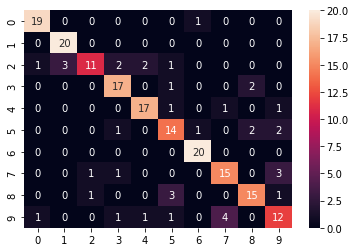

In [20]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)